In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns

In [51]:
df=pd.read_csv("C:/Users/Kiran/OneDrive/Desktop/WELFake_Dataset.csv")

In [52]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [54]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [55]:
del df['Unnamed: 0']
df=df.fillna('')
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [56]:
df.describe(include='all')

,title,text,label
count,72134,72134,72134.000000
unique,62348,62719,NaN
top,,,NaN
freq,558,738,NaN
mean,NaN,NaN,0.514404
std,NaN,NaN,0.499796
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,1.000000


In [57]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


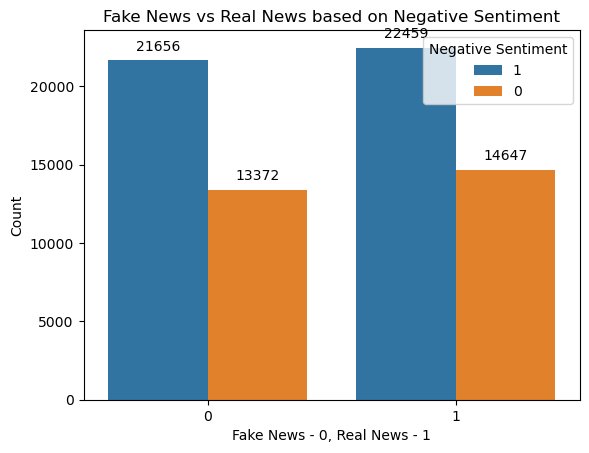

In [58]:
def keywordflag(keywords):
    flag = []
    length = len(df)
    for h in range(length):
        try:
            heading = df['text'][h].lower()
            if any(keyword.lower() in heading for keyword in keywords):
                flag.append(1)
            else:
                flag.append(0)
        except:
            flag.append(0)
    return flag
colflag = keywordflag(['murder', 'cheat', 'fraud', 'scam', 'loss', 'steal', 'racist', 'hatred', 'sad', 'demise', 'succumbed', 'lost', 'poll', 'rape', 'molest', 'theft', 'robbery', 'steal', 'stole'])
df['NegativeSentiment']= pd.Series(colflag)
def bodylength(sentence):
    return len(sentence.replace(" ", ""))
df["wordcount"] = df["text"].apply(bodylength)
ax = sns.countplot(x='label', hue='NegativeSentiment', data=df)
plt.xlabel('Fake News - 0, Real News - 1')
plt.ylabel('Count')
plt.title('Fake News vs Real News based on Negative Sentiment')
plt.legend(title='Negative Sentiment', labels=['1', '0'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()




In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

In [60]:
text_data = df['text']
vectorizer = CountVectorizer(ngram_range=(2, 2),stop_words='english',min_df=5,max_df=0.5)
X2 = vectorizer.fit_transform(text_data)
feature_names = vectorizer.get_feature_names_out()

In [61]:
bi_gram_count = X2.sum(axis=0).A1
bi_gram_df = pd.DataFrame({'bi_gram': feature_names, 'count': bi_gram_count})
bi_gram_list = vectorizer.get_feature_names_out()
top_bi_grams = bi_gram_df.nlargest(columns="count", n=10)
top_bi_grams

,bi_gram,count
161300,donald trump,39995
557077,united states,34341
583395,white house,23651
238855,hillary clinton,22826
348983,new york,19963
339401,mr trump,19051
53304,barack obama,8411
401956,president donald,8237
352472,north korea,7988
193855,featured image,7930


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix , classification_report

In [63]:
df['text'] = df['text'].fillna('')
X = df['text'].tolist()
y = df['label']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Convert the text data into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [65]:
# Train the model using Multinomial Naive Bayes algorithm
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [66]:
# Evaluate the model's accuracy on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy of the model is {accuracy:.2%}.')

The accuracy of the model is 86.73%.


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7089
           1       0.87      0.87      0.87      7338

    accuracy                           0.87     14427
   macro avg       0.87      0.87      0.87     14427
weighted avg       0.87      0.87      0.87     14427

